In [8]:
import pandas as pd
import sqlite3

## make a connection to the database

In [9]:
dataset_link = "https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M"
file_id = dataset_link.split("=")[-1]
file_path = '../data/checking-logs.sqlite'
!mkdir ../data
!gdown {file_id} -O {file_path}
!ls

mkdir: ../data: File exists
Downloading...
From: https://drive.google.com/uc?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M
To: /Users/dhawkgir/ds/day07/data/checking-logs.sqlite
100%|████████████████████████████████████████| 344k/344k [00:00<00:00, 4.15MB/s]
00_line_chart.ipynb


In [10]:
con = sqlite3.connect(file_path)
cur = con.cursor()

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [11]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
'''
df = pd.read_sql(query, con, parse_dates=['datetime'])
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


##  using Pandas, create a new dataframe where the visits are counted and grouped by date

In [12]:
df_count_day = df.datetime.dt.date.value_counts().sort_index().reset_index()
df_count_day.columns = ['date','COUNT']
df_count_day.set_index('date', inplace=True)
df_count_day

,COUNT
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


## using Pandas method .plot(), create a graph


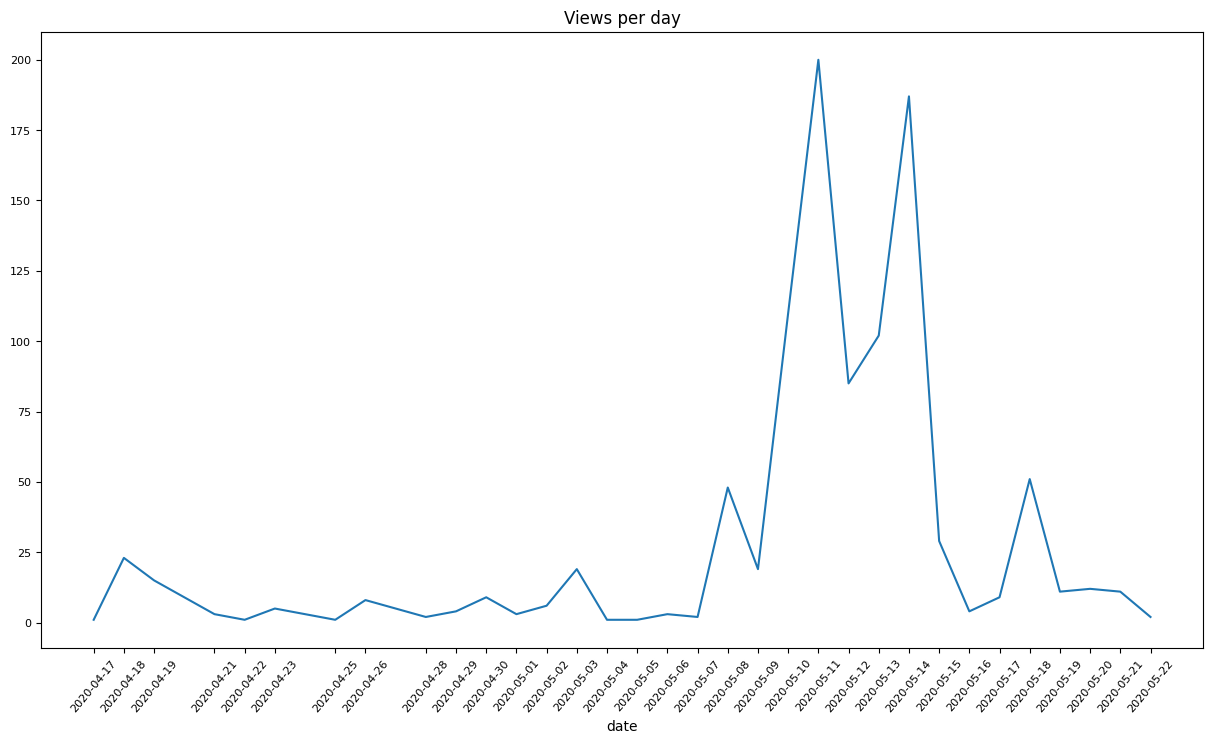

In [13]:
ax = df_count_day.COUNT.plot(fontsize=8, figsize=(15, 8), title='Views per day', xticks=df_count_day.index, rot=50)

## close the connection to the database

In [14]:
con.close()